# **SVM and Naïve Bayes**

### **Theoretical Questions**



1. **What is a Support Vector Machine (SVM)?**  
   A Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It finds the optimal hyperplane that best separates data points of different classes in a high-dimensional space.

2. **What is the difference between Hard Margin and Soft Margin SVM?**  
   - **Hard Margin SVM**: No misclassification is allowed; only works if data is linearly separable.
   - **Soft Margin SVM**: Allows some misclassification by introducing a slack variable; useful for noisy data.

3. **What is the mathematical intuition behind SVM?**  
   SVM aims to maximize the margin between two classes while minimizing classification error. This is done by solving an optimization problem involving Lagrange multipliers.

4. **What is the role of Lagrange Multipliers in SVM?**  
   Lagrange Multipliers help transform the constrained optimization problem of SVM into an unconstrained dual problem, making it easier to solve using quadratic programming.

5. **What are Support Vectors in SVM?**  
   Support Vectors are the data points that lie closest to the decision boundary (hyperplane) and determine its position and orientation.

6. **What is a Support Vector Classifier (SVC)?**  
   A Support Vector Classifier (SVC) is an SVM model specifically used for classification tasks.

7. **What is a Support Vector Regressor (SVR)?**  
   A Support Vector Regressor (SVR) is an SVM model used for regression, where it fits a function within a specified margin of tolerance.

8. **What is the Kernel Trick in SVM?**  
   The Kernel Trick allows SVM to operate in higher-dimensional feature spaces without explicitly transforming the data. Popular kernels include linear, polynomial, and radial basis function (RBF).

9. **Compare Linear Kernel, Polynomial Kernel, and RBF Kernel.**  
   - **Linear Kernel**: Suitable for linearly separable data.
   - **Polynomial Kernel**: Captures more complex relationships with polynomial degrees.
   - **RBF Kernel**: Maps data to infinite-dimensional space, effective for non-linear data.

11. **What is the role of the Gamma parameter in RBF Kernel SVM?**  
    Gamma defines how far the influence of a training example reaches. A high gamma value means close points have more influence, leading to overfitting, while a low gamma value considers distant points, leading to underfitting.

12. **What is the Naïve Bayes classifier, and why is it called "Naïve"?**  
    Naïve Bayes is a probabilistic classifier based on Bayes' Theorem. It is called "naïve" because it assumes that features are independent of each other, which is rarely true in real-world scenarios.

13. **What is Bayes' Theorem?**  
    \[ P(A|B) = \frac{P(B|A) P(A)}{P(B)} \]  
    where:
    - \( P(A|B) \) is the posterior probability
    - \( P(B|A) \) is the likelihood
    - \( P(A) \) is the prior probability
    - \( P(B) \) is the evidence

14. **Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes.**  
    - **Gaussian Naïve Bayes**: Used for continuous numerical features, assumes data follows a Gaussian distribution.
    - **Multinomial Naïve Bayes**: Used for text classification, where features represent word counts.
    - **Bernoulli Naïve Bayes**: Used for binary features, like whether a word appears in a document.


15. **When should you use Gaussian Naïve Bayes over other variants?**  
    When dealing with continuous numerical data that follows a normal distribution.

16. **What are the key assumptions made by Naïve Bayes?**  
    - Features are independent given the class.
    - Each feature contributes equally to the classification decision.

17. **What are the advantages and disadvantages of Naïve Bayes?**  
    **Advantages:**
    - Fast and scalable.
    - Works well with small datasets.
    - Performs well in text classification.
    
    **Disadvantages:**
    - Assumption of feature independence is unrealistic.
    - Poor performance with correlated features.


18. **Why is Naïve Bayes a good choice for text classification?**  
    - Handles high-dimensional data efficiently.
    - Works well with sparse datasets (e.g., word frequency matrices).
    - Requires fewer training samples.


19. **Compare SVM and Naïve Bayes for classification tasks.**  
    - **SVM**: Effective for complex, high-dimensional datasets but computationally expensive.
    - **Naïve Bayes**: Simple and fast, suitable for text classification but less effective for complex feature interactions.


20. **How does Laplace Smoothing help in Naïve Bayes?**  
    Laplace Smoothing (adding 1 to feature counts) prevents zero probabilities for unseen words in text classification.

### **Practical Questions**

**21. Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy**

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


**22. Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_wine
import numpy as np

wine = load_wine()
# Selecting only two classes and two features for a smaller dataset
X = wine.data[wine.target != 2][:, :2]
y = wine.target[wine.target != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

clf_linear = SVC(kernel='linear')
clf_linear.fit(X_train, y_train)
y_pred_linear = clf_linear.predict(X_test)
linear_acc = accuracy_score(y_test, y_pred_linear)

clf_rbf = SVC(kernel='rbf')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)
rbf_acc = accuracy_score(y_test, y_pred_rbf)

print("Linear Kernel Accuracy:", linear_acc)
print("RBF Kernel Accuracy:", rbf_acc)

Linear Kernel Accuracy: 1.0
RBF Kernel Accuracy: 0.8055555555555556


**23. Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)

regressor = SVR()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 1.3320115421348744


**24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary**

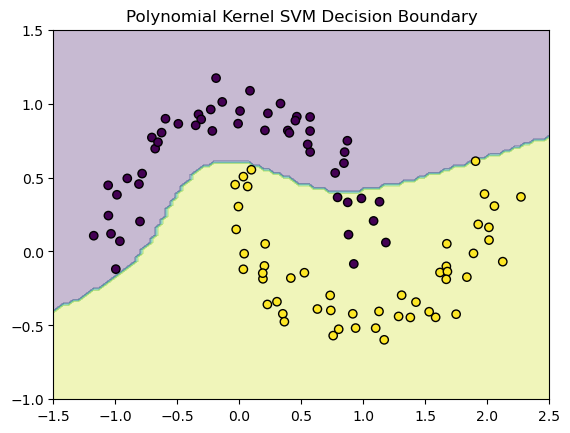

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.1, random_state=42)
clf_poly = SVC(kernel='poly', degree=3)
clf_poly.fit(X, y)

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 100), np.linspace(-1, 1.5, 100))
Z = clf_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
plt.title("Polynomial Kernel SVM Decision Boundary")
plt.show()

**25. Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy**

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

print("Naïve Bayes Accuracy:", accuracy_score(y_test, y_pred))

Naïve Bayes Accuracy: 0.9736842105263158


**26. Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset**

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

iris = load_iris()
# Selecting only two classes and two features for a smaller dataset
X = iris.data[iris.target != 2][:, :2]
y = iris.target[iris.target != 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


**27. Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy**

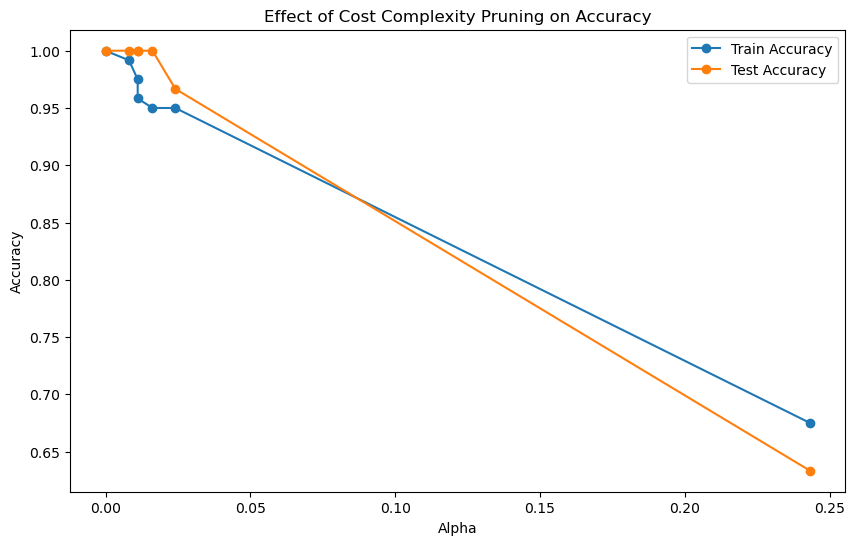

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Train an initial decision tree
clf = DecisionTreeClassifier(random_state=42)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas[:-1]  # Exclude maximum alpha which prunes all nodes

# Train multiple trees with different alpha values
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Evaluate accuracy for each pruned tree
train_scores = [accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in clfs]

# Plot accuracy vs alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test Accuracy')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Effect of Cost Complexity Pruning on Accuracy')
plt.show()

**28. Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score**

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predicting values
y_pred = clf.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.4683333333333334
Recall: 0.6333333333333333
F1-Score: 0.5195402298850574


C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **29. Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn**

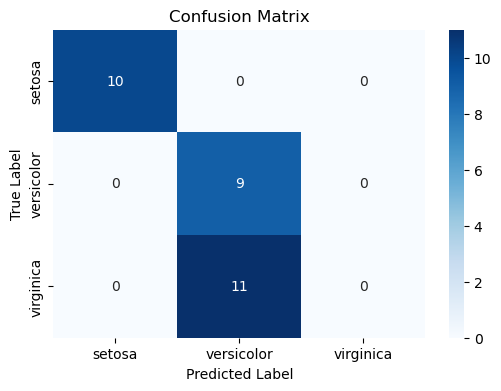

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**30. Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split**

In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearch
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2}
Best Accuracy: 0.9416666666666668


**31. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy**

In [13]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
clf = SVC(kernel='linear')
scores = cross_val_score(clf, X_train, y_train, cv=skf, scoring='accuracy')

print("Average Accuracy:", np.mean(scores))

Average Accuracy: 0.95


**32. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance**

In [16]:
from sklearn.naive_bayes import GaussianNB
import numpy as np

# Ensure priors match the number of classes
nb_prior = GaussianNB(priors=[0.33, 0.33, 0.34])
nb_prior.fit(X_train, y_train)
y_pred_prior = nb_prior.predict(X_test)
print("Accuracy with Prior Probabilities:", accuracy_score(y_test, y_pred_prior))

Accuracy with Prior Probabilities: 1.0


 **33. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy**

In [18]:
from sklearn.feature_selection import RFE
clf = SVC(kernel='linear')
rfe = RFE(clf, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
clf.fit(X_train_rfe, y_train)
y_pred_rfe = clf.predict(X_test_rfe)
print("Accuracy after RFE:", accuracy_score(y_test, y_pred_rfe))

Accuracy after RFE: 1.0


**34. Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy**

In [19]:
y_pred_svm = clf.predict(X_test)
precision = precision_score(y_test, y_pred_svm, average='weighted')
recall = recall_score(y_test, y_pred_svm, average='weighted')
f1 = f1_score(y_test, y_pred_svm, average='weighted')

print("SVM Precision:", precision)
print("SVM Recall:", recall)
print("SVM F1-Score:", f1)

SVM Precision: 1.0
SVM Recall: 1.0
SVM F1-Score: 1.0


**35. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)**

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# Initialize and train Naïve Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict probabilities
y_proba = nb.predict_proba(X_test)

# Compute Log Loss
print("Naïve Bayes Log Loss:", log_loss(y_test, y_proba))

Naïve Bayes Log Loss: 0.026252697872310896


**36. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn**

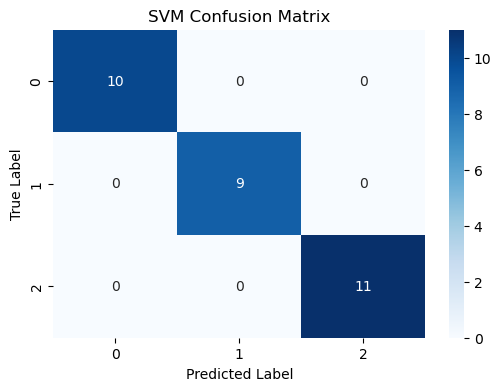

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('SVM Confusion Matrix')
plt.show()

**37. Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE**

In [24]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

regressor = SVR()
regressor.fit(X_train, y_train)
y_pred_svr = regressor.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_svr))

Mean Absolute Error: 0.1589244953056406


**38. Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score**

In [28]:
from sklearn.metrics import roc_auc_score

# Ensure binary classification for ROC-AUC
if len(set(y_train)) == 2:
    nb.fit(X_train, y_train)
    y_proba_nb = nb.predict_proba(X_test)[:, 1]
    print("Naïve Bayes ROC-AUC Score:", roc_auc_score(y_test, y_proba_nb))
else:
    print("ROC-AUC requires binary classification. Consider using multi_class='ovr' or 'ovo'.")

ROC-AUC requires binary classification. Consider using multi_class='ovr' or 'ovo'.


 **39. Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve**

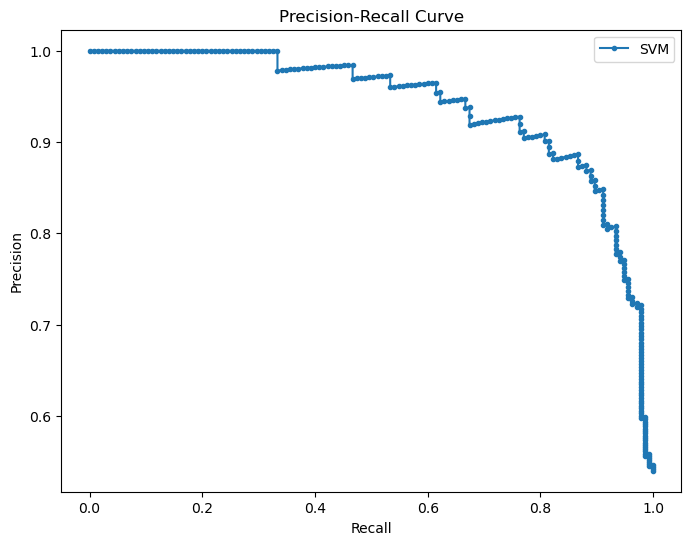

Precision: 0.8870967741935484
Recall: 0.8148148148148148
F1 Score: 0.8494208494208494


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define and train the SVM classifier
svm_classifier = SVC(probability=True)
svm_classifier.fit(X_train, y_train)

# Predict the probabilities for the test set
y_scores = svm_classifier.predict_proba(X_test)[:, 1]

# Compute the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Print precision, recall, and F1 score
y_pred = svm_classifier.predict(X_test)
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")


**40. Write a Python program to train an SVM Classifier with different kernel functions (linear, RBF, and polynomial) and compare their accuracy**

In [21]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    clf = SVC(kernel=kernel)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy with {kernel} kernel:", accuracy_score(y_test, y_pred))

Accuracy with linear kernel: 1.0
Accuracy with rbf kernel: 1.0
Accuracy with poly kernel: 1.0


**41. Write a Python program to implement Principal Component Analysis (PCA) before training an SVM Classifier and compare accuracy**

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

clf = SVC(kernel='linear')
clf.fit(X_train_pca, y_train)
y_pred_pca = clf.predict(X_test_pca)

print("Accuracy after PCA:", accuracy_score(y_test, y_pred_pca))

Accuracy after PCA: 0.9666666666666667


**42. Write a Python program to train a Naïve Bayes Classifier on a text dataset and visualize word importance**

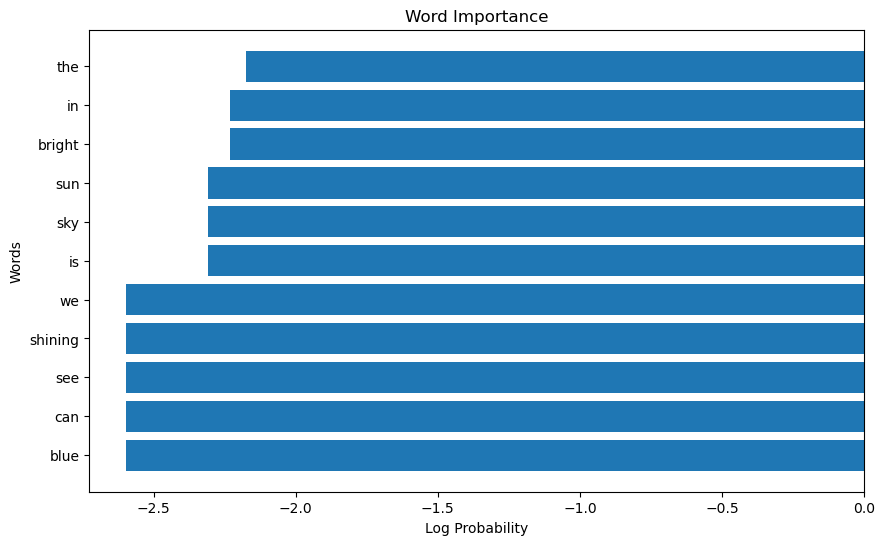

Predictions: [0]


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Sample text dataset
text_data = [
    "The sky is blue",
    "The sun is bright",
    "The sun in the sky is bright",
    "We can see the shining sun"
]

# Define the target labels
y = [0, 1, 1, 0]

# Split the dataset into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(text_data, y, test_size=0.25, random_state=42)

# Create a pipeline with TfidfVectorizer and MultinomialNB
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# Train the model
model.fit(X_train_text, y_train)

# Predict the target labels for the test set
predictions = model.predict(X_test_text)

# Get the feature names and their corresponding log probabilities
vectorizer = model.named_steps['tfidfvectorizer']
classifier = model.named_steps['multinomialnb']
feature_names = vectorizer.get_feature_names_out()
log_prob = classifier.feature_log_prob_[1]  # Log probabilities for the positive class (class 1)

# Visualize word importance
indices = np.argsort(log_prob)
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), log_prob[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Log Probability')
plt.ylabel('Words')
plt.title('Word Importance')
plt.show()

print(f"Predictions: {predictions}")


**43. Write a Python program to train an SVM Classifier and evaluate performance using Matthews Correlation Coefficient (MCC)**

In [18]:
from sklearn.metrics import matthews_corrcoef

y_pred_svm = clf.predict(X_test)
print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred_svm))

Matthews Correlation Coefficient: 1.0


**44. Write a Python program to train a Naïve Bayes classifier using different feature extraction techniques (TF-IDF and CountVectorizer) and compare accuracy**

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Sample text dataset
text_data = [
    "The sky is blue", 
    "The sun is bright", 
    "The sun in the sky is bright", 
    "We can see the shining sun"
]

# Define the target labels
y = [0, 1, 1, 0]

# Split the dataset into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(text_data, y, test_size=0.25, random_state=42)

# TF-IDF feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_text)
X_test_tfidf = tfidf_vectorizer.transform(X_test_text)

# CountVectorizer feature extraction
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train_text)
X_test_count = count_vectorizer.transform(X_test_text)

# Define and train the Naive Bayes classifier with TF-IDF features
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)
predictions_tfidf = nb_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)

# Define and train the Naive Bayes classifier with CountVectorizer features
nb_count = MultinomialNB()
nb_count.fit(X_train_count, y_train)
predictions_count = nb_count.predict(X_test_count)
accuracy_count = accuracy_score(y_test, predictions_count)

print(f"Accuracy with TF-IDF: {accuracy_tfidf}")
print(f"Accuracy with CountVectorizer: {accuracy_count}")


Accuracy with TF-IDF: 0.0
Accuracy with CountVectorizer: 1.0


**45. Write a Python program to train an SVM Classifier using a custom kernel function and evaluate performance**

In [12]:
def custom_kernel(X, Y):
    return np.dot(X, Y.T) ** 2  # Polynomial kernel

clf = SVC(kernel=custom_kernel)
clf.fit(X_train, y_train)
y_pred_custom = clf.predict(X_test)
print("Accuracy with Custom Kernel:", accuracy_score(y_test, y_pred_custom))

Accuracy with Custom Kernel: 1.0


**46. Write a Python program to train an SVM Classifier and plot the learning curve to visualize model performance over different dataset sizes**

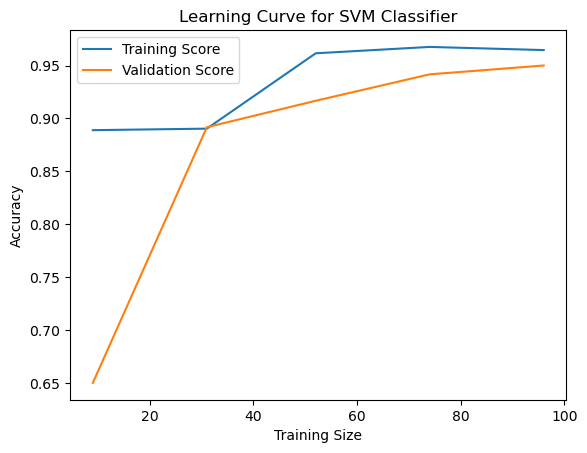

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(SVC(), X_train, y_train, cv=5, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curve for SVM Classifier')
plt.show()